# Analisis de Resultados Entregados por el Optimizador

In [26]:
# Importamos las librerías
from os import path, listdir, getcwd
from pandas import read_csv
import matplotlib.pyplot as plt

In [45]:
# Sacamos todos los archivos de la carpeta resultados
dict_names = {}
dirname = path.dirname(getcwd())
for arc in listdir(f'{dirname}/Resultados'):
    name = arc.split('__')
    if dict_names.get(name[0]):
        dict_names.get(name[0]).append(arc)
    else:
        dict_names[name[0]] = [arc]

In [52]:
# Creamos los dataframes con los archivos 
var = 'Var_V_Pgen'
names_files = dict_names.get(var)
df1 = read_csv(f'{dirname}/Resultados/{names_files[0]}')
df2 = read_csv(f'{dirname}/Resultados/{names_files[1]}')

In [53]:
# creamos las listas para graficar
dict_df1 = dict((df1.iloc[i][0], df1.iloc[i][1]) for i in range(df1.shape[0]))
dict_df2 = dict((df2.iloc[i][0], df2.iloc[i][1]) for i in range(df2.shape[0]))
dict_gen_df1, dict_gen_df2 = {},{}
for key, value in dict_df1.items():
    gen = key.split("'")[1]
    if dict_gen_df1.get(gen):
        dict_gen_df1.get(gen).append(value)
    else:
        dict_gen_df1[gen] = [value]
for key, value in dict_df2.items():
    gen = key.split("'")[1]
    if dict_gen_df2.get(gen):
        dict_gen_df2.get(gen).append(value)
    else:
        dict_gen_df2[gen] = [value]

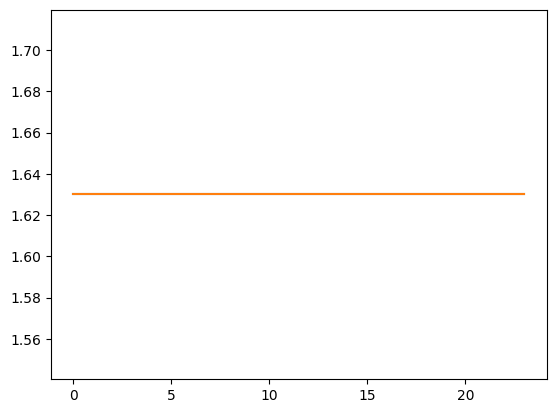

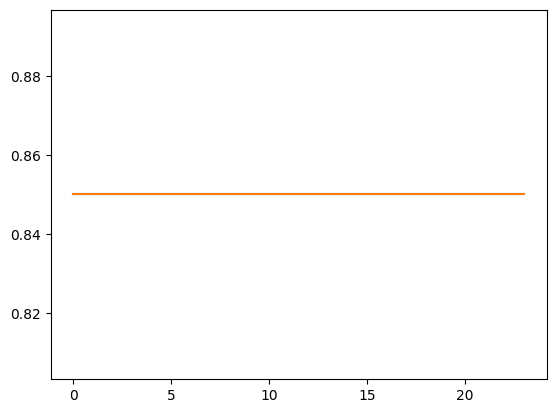

In [54]:
# graficamos 
for key in dict_gen_df1:
    plt.plot(dict_gen_df1.get(key))
    plt.plot(dict_gen_df2.get(key))
    plt.show()
